In [10]:
import numpy as np
import matplotlib.pyplot as plt
from freudenthal import freudenthal_grid
import bats
import time

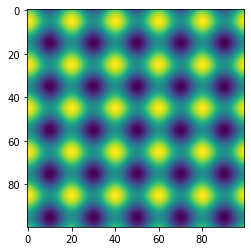

In [11]:
n = 100
img = np.empty((n,n), dtype=np.float64)
for i in range(n):
    for j in range(n):
        img[i,j] = np.sin(10* np.pi * i / n) + np.cos(10* np.pi * j/n)
        
plt.imshow(img)

In [17]:
def time_BATS_update(img, img2):
    m, n = img.shape
    X = freudenthal_grid(m, n)
    
    t0 = time.monotonic()
    vals, imap = bats.lower_star_filtration(X, img.flatten())
    t1 = time.monotonic()
    print("time to extend: {} sec.".format(t1 - t0))
    
    t0 = time.monotonic()
    F = bats.FilteredSimplicialComplex(X, vals)
    t1 = time.monotonic()
    print("time to construct: {} sec.".format(t1 - t0))
    
    t0 = time.monotonic()
    R = bats.reduce(F, bats.F2())
    t1 = time.monotonic()
    print("time to reduce: {} sec.".format(t1 - t0))
    
    t0 = time.monotonic()
    vals, imap = bats.lower_star_filtration(X, img2.flatten())
    R.update_filtration(vals)
    t1 = time.monotonic()
    print("time to update: {} sec.".format(t1 - t0))
    
    t0 = time.monotonic()
    vals, imap = bats.lower_star_filtration(X, img2.flatten())
    F = bats.FilteredSimplicialComplex(X, vals)
    R = bats.reduce(F, bats.F2())
    t1 = time.monotonic()
    print("img2 from scratch: {} sec.".format(t1 - t0))


In [19]:
for n in [50, 100, 150, 200, 250, 300]:
    print("\n{}".format(n))
    img = np.empty((n,n), dtype=np.float64)
    for i in range(n):
        for j in range(n):
            img[i,j] = np.sin(10* np.pi * i / n) + np.cos(10* np.pi * j/n)
    
    img2 = img + 0.01 * np.random.randn(n,n)
    
    time_BATS_update(img, img2)


50
time to extend: 0.004172535001998767 sec.
time to construct: 0.009342403995105997 sec.
time to reduce: 0.016199614998186007 sec.
time to update: 0.008625080998172052 sec.
img2 from scratch: 0.03368512699671555 sec.

100
time to extend: 0.011179612993146293 sec.
time to construct: 0.019134627989842556 sec.
time to reduce: 0.06450657099776436 sec.
time to update: 0.030526910006301478 sec.
img2 from scratch: 0.11974705899774563 sec.

150
time to extend: 0.022598590003326535 sec.
time to construct: 0.0402850839891471 sec.
time to reduce: 0.1986201620020438 sec.
time to update: 0.0747111560049234 sec.
img2 from scratch: 0.3508989479887532 sec.

200
time to extend: 0.04010366500006057 sec.
time to construct: 0.05656789800559636 sec.
time to reduce: 0.48786382999969646 sec.
time to update: 0.16014974299469031 sec.
img2 from scratch: 0.825046611003927 sec.

250
time to extend: 0.062271506001707166 sec.
time to construct: 0.08769389899680391 sec.
time to reduce: 0.9968800180067774 sec.
time